In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 6)
mpl.rcParams['axes.grid'] = False

In [4]:
# Now, we will load the data set and look at some initial rows and data types of the columns:
# This is Daily energy consumption (kwh) data of a Data Center for one year
data = pd.read_excel(r'ENZ_DC.xls')
print (data.head())
print ('\n Data Types:')
print (data.info())

        Date          ENZ
0 2018-01-01  5555.300000
1 2018-01-02  5755.050000
2 2018-01-03  5736.791667
3 2018-01-04  5756.791667
4 2018-01-05  5893.475000

 Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   ENZ     358 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB
None


In [5]:
### Data has already a column with datetime format and there are 7 null values in ENZ column

In [6]:
data.set_index('Date',inplace= True) ## Conveting date column as index

In [7]:
data['ENZ']

Date
2018-01-01    5555.300000
2018-01-02    5755.050000
2018-01-03    5736.791667
2018-01-04    5756.791667
2018-01-05    5893.475000
                 ...     
2018-12-27    5027.850000
2018-12-28    5293.366667
2018-12-29    5200.650000
2018-12-30    5146.150000
2018-12-31    4933.500000
Name: ENZ, Length: 365, dtype: float64

In [8]:
data.loc['2018-12-1':] ## slicing example

,ENZ
Date,
2018-12-01,5749.825000
2018-12-02,5871.666667
2018-12-03,5362.925000
2018-12-04,5442.958333
2018-12-05,5787.741667
2018-12-06,5998.483333
2018-12-07,5896.000000
2018-12-08,6087.158333
2018-12-09,6205.700000


<AxesSubplot:xlabel='Date'>

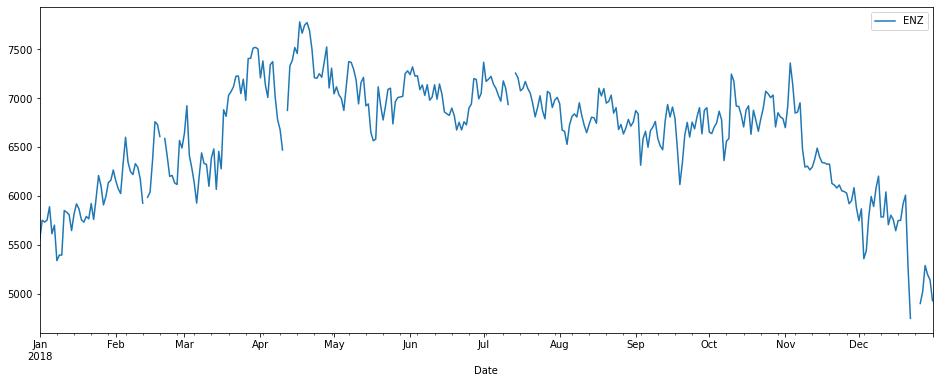

In [9]:
data.plot()#

In [10]:
data.fillna(method='ffill', inplace=True) ## Filling the nan value with forward fill

#### Check Stationarity 
* We are going to make a function for this because the data is typical and we have to check after each transformation for making it stationary.
* Augumented Dickey-Fuller Test is used here.

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def ADF_TEST(data_series):
    print('Results of ADF Test:')
    dftest = adfuller(data_series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dfoutput['Test Statistic'] < dfoutput['Critical Value (5%)']:  ## Comparing with 5% significant Level
        print('Series is stationary')
    else:
        print('Series is not Stationary')
    ## OR 
    # if dfoutput[1] > 0.05 :
    #    print('Series is not Stationary')
    #else:
    #    print('Series is Stationary')

In [13]:
ADF_TEST(data)

Results of ADF Test:
Test Statistic                  -1.008569
p-value                          0.750126
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
Series is not Stationary


#### There are many ways to make a data stationary 
* Differencing, taking Log and Differencing--> you can try these method on this data.Let me know if it works.Best of Luck!!. 
* Breaking the time series and detrending and working on detrended --> This approach is used here.  

### Breaking a time series: 
* Systematic: Components of the time series that have consistency or recurrence and can be described and modeled are viz.evel, trend, seasonality.
* Non-Systematic: Components of the time series that cannot be directly modeled is noise

These components are defined as follows:

* Level: The average value in the series.
* Trend: The increasing or decreasing value in the series.
* Seasonality: The repeating short-term cycle in the series.
* Noise: The random variation in the series.
>So a time series is thought to be an aggregate or combination of these four components.
>All series have a level and noise. The trend and seasonality components are optional.
>It is helpful to think of the components as combining either additively or multiplicatively as given by relation below:
* y(t) = Level + Trend + Seasonality + Noise
* y(t) = Level * Trend * Seasonality * Noise

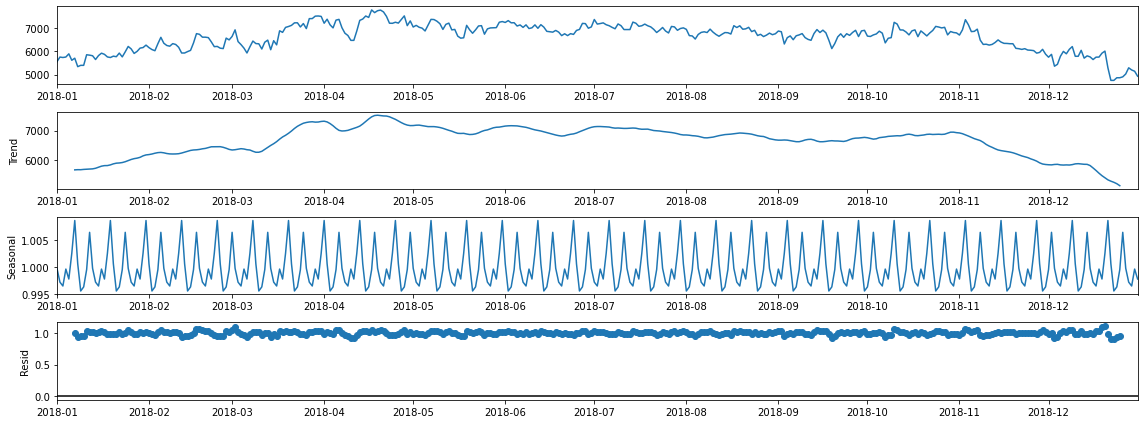

In [14]:
#Multiplicative decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative',period=12)
result.plot()
plt.show()

In [15]:
trend = result.trend
seasonal = result.seasonal
residual = result.resid

## Detrending the data

In [29]:
data_with_trend=pd.concat([data,pd.DataFrame(trend)],axis=1).dropna()
data_with_trend['detrend_value']=data_with_trend.ENZ-data_with_trend.trend
data_with_trend

,ENZ,trend,detrend_value
Date,,,
2018-01-07,5705.541667,5665.275000,40.266667
2018-01-08,5343.158333,5671.610764,-328.452431
2018-01-09,5399.633333,5670.667361,-271.034028
2018-01-10,5399.633333,5681.010764,-281.377431
2018-01-11,5854.816667,5687.036806,167.779861
...,...,...,...
2018-12-21,5293.366667,5326.750347,-33.383681
2018-12-22,4753.558333,5281.362847,-527.804514
2018-12-23,4753.558333,5243.607986,-490.049653


<AxesSubplot:xlabel='Date'>

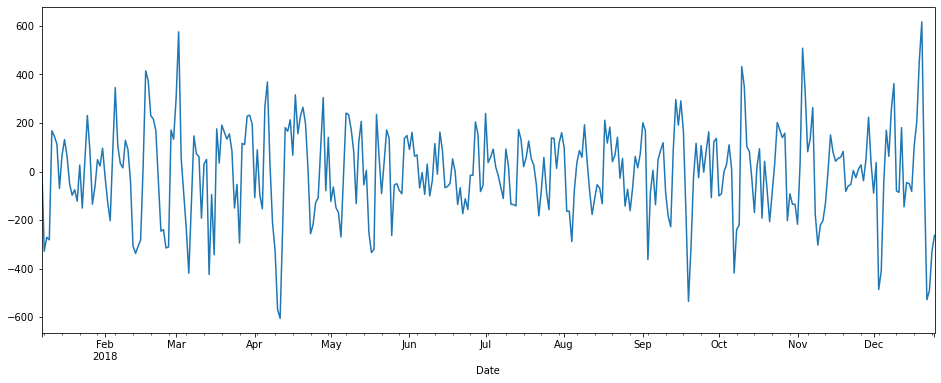

In [30]:
detrended_data=data_with_trend['detrend_value']
detrended_data.plot()

#### Checking the Stationarity of the detrended data

In [31]:
ADF_TEST(detrended_data)

Results of ADF Test:
Test Statistic                -9.916882e+00
p-value                        3.063307e-17
#Lags Used                     8.000000e+00
Number of Observations Used    3.440000e+02
Critical Value (1%)           -3.449503e+00
Critical Value (5%)           -2.869979e+00
Critical Value (10%)          -2.571266e+00
dtype: float64
Series is stationary


#### PLotting ACF & PACF

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

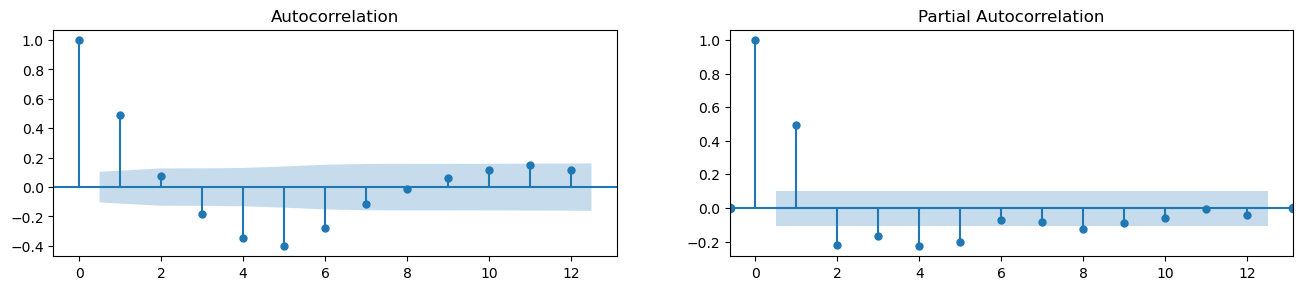

In [21]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(detrended_data, lags=12,ax=axes[0])
plot_pacf(detrended_data, lags=12,use_vlines=True, marker='o',ax=axes[1])
plt.show()

* from PACF graph : p=1 
* for q we can try for both q=1 & 2, here q=1 is used.

### Modelling

In [22]:
from statsmodels.tsa.arima_model import ARIMA
#The p,d,q values can be specified using the 
#order argument of ARIMA which take a tuple (p,d,q).

C:\Users\hP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMS: 159.5017
MAE: 123.9811


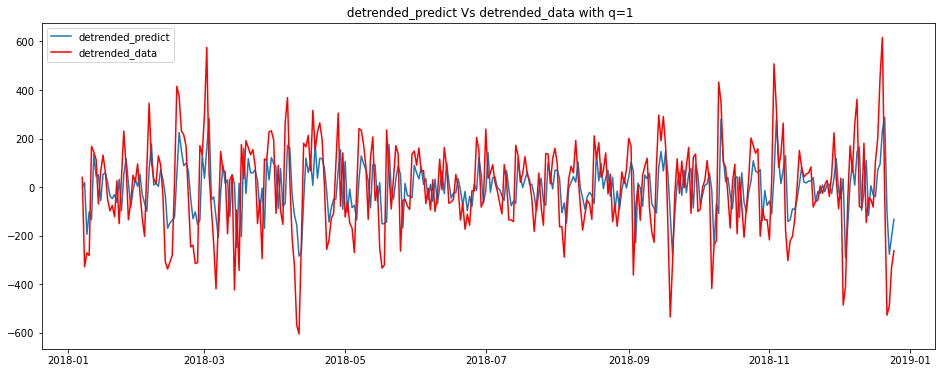

In [23]:
model1 = ARIMA(detrended_data, order=(1, 0, 1))  
results_ARIMA = model1.fit(disp=-1)  
detrended_predict=results_ARIMA.fittedvalues
plt.plot(detrended_predict,label='detrended_predict')
plt.plot(detrended_data, color='red',label='detrended_data')

print('RMS: %.4f'% np.sqrt(np.mean((detrended_predict-detrended_data)**2)))
print('MAE: %.4f'%np.mean(np.abs(detrended_predict-detrended_data)))
plt.legend()
plt.title(' detrended_predict Vs detrended_data with q=1')
plt.show()

### Adding back the trend to the predicted value  and then comparing with the original data

In [38]:
data_with_trend.head()

,ENZ,trend,detrend_value,detrended_pred,Final_prediction
Date,,,,,
2018-01-07,5705.541667,5665.275000,40.266667,0.655843,5665.930843
2018-01-08,5343.158333,5671.610764,-328.452431,11.839747,5683.450511
2018-01-09,5399.633333,5670.667361,-271.034028,-132.642670,5538.024691
2018-01-10,5399.633333,5681.010764,-281.377431,1.843943,5682.854707
2018-01-11,5854.816667,5687.036806,167.779861,-36.367755,5650.669050


#### Adding  a  column for 'detrended_pred' and another for 'Final_prediction' in above dataframe 
#### where--> Final_prediction= detrended_pred+ trend

In [35]:
data_with_trend['detrended_pred']=detrended_predict
data_with_trend['Final_prediction']=data_with_trend['trend']+data_with_trend['detrended_pred']

In [36]:
data_with_trend.head()

,ENZ,trend,detrend_value,detrended_pred,Final_prediction
Date,,,,,
2018-01-07,5705.541667,5665.275000,40.266667,0.655843,5665.930843
2018-01-08,5343.158333,5671.610764,-328.452431,11.839747,5683.450511
2018-01-09,5399.633333,5670.667361,-271.034028,-132.642670,5538.024691
2018-01-10,5399.633333,5681.010764,-281.377431,1.843943,5682.854707
2018-01-11,5854.816667,5687.036806,167.779861,-36.367755,5650.669050


RMS :  159.50173258258243
RMS :  123.98111815653557


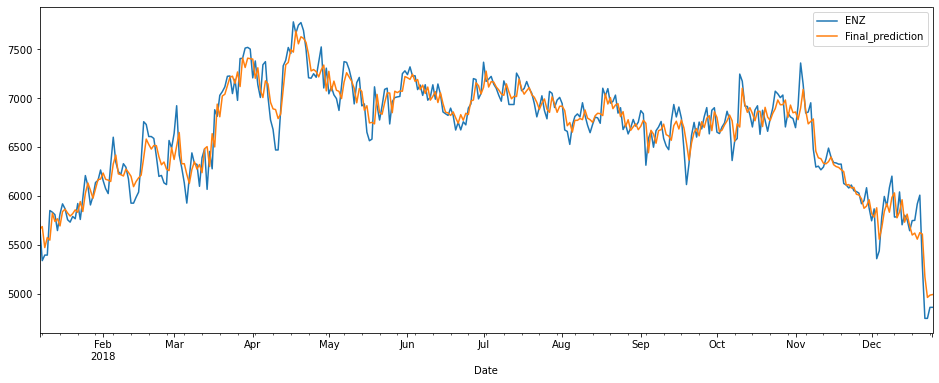

In [28]:
#Now comparing initial ENZ and final prediction
data_with_trend[['ENZ','Final_prediction']].plot()
print('RMS : ',np.sqrt(np.mean((data_with_trend.ENZ-data_with_trend.Final_prediction)**2)))
print('RMS : ',np.mean(np.abs(data_with_trend.ENZ-data_with_trend.Final_prediction)))

### Still it is not the time to be happy. How to forcast for, say, 30 time step ahead?
* STEP 1: Get Detrended forcast for 30 time step ahead
* STEP 2: Add the corresponding trend of one year lag
* How to do this?
* Follow the steps below:

### Note here,  we don't have the trend data before 2018-01-07 
* We can assume trend is same  as that of 2018-01-07 for few days before.(For sake of completeness only).

In [81]:
data_with_trend

,ENZ,trend,detrend_value,detrended_pred,Final_prediction
Date,,,,,
2018-01-07,5705.541667,5665.275000,40.266667,0.655843,5665.930843
2018-01-08,5343.158333,5671.610764,-328.452431,11.839747,5683.450511
2018-01-09,5399.633333,5670.667361,-271.034028,-132.642670,5538.024691
2018-01-10,5399.633333,5681.010764,-281.377431,1.843943,5682.854707
2018-01-11,5854.816667,5687.036806,167.779861,-36.367755,5650.669050
...,...,...,...,...,...
2018-12-21,5293.366667,5326.750347,-33.383681,-19.674472,5307.075876
2018-12-22,4753.558333,5281.362847,-527.804514,-316.384666,4964.978181
2018-12-23,4753.558333,5243.607986,-490.049653,-289.226513,4954.381473


In [50]:
# Generating forecast range
forecast_range=pd.date_range(start='2018-12-26', periods=30,freq='d')
forecast_range

### Getting one year lag trend for the future timestaps to be predicted.
* one year lag trend for  time stamps --> ['2019-01-07', '...', '...','2019-01-24']
* That will be --> from [2018-01-07,...,..,..., 2018-01-24]--> available in past data         
* Assuming trend before '2019-01-07' time stamp is same as that of 2018-01-07, --> not availabe in the data

In [61]:
d1=data_with_trend.loc['2018-01-07':'2018-01-24','trend']

In [62]:
d2=pd.Series(np.ones(12)*5665.275000,index=pd.date_range(start='2017-12-26', periods=12,freq='d'))

In [64]:
last_year_trend=pd.concat([d2,d1],axis=0)
len(last_year_trend)

30

In [52]:
# Create predictions for the future, 
preds = results_ARIMA.forecast(steps=30)# Number of forecast from the end of sample

# Result contain  three array inside a tuple : 1. predicted value with 2.lower and 3.upper bound for 95% confidence interval
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html

In [65]:
future_pred=preds[0]+last_year_trend.values

<AxesSubplot:>

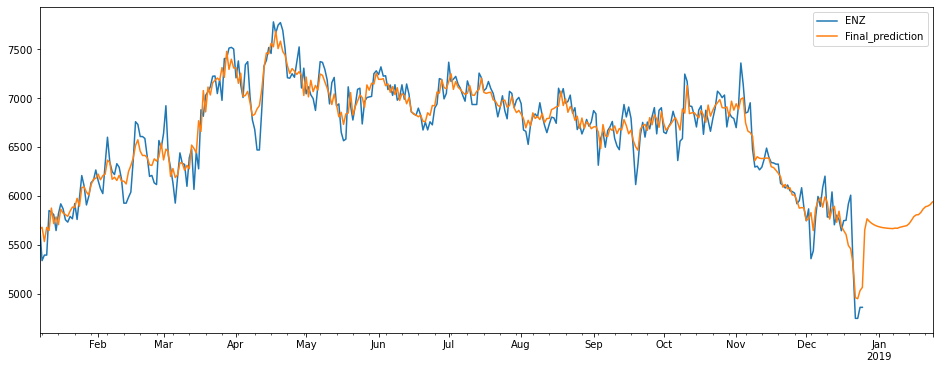

In [79]:
df=pd.DataFrame(future_pred,index=forecast_range,columns=['Final_prediction'])
df1=pd.concat([data_with_trend,df],axis=0)
df1[['ENZ','Final_prediction']].plot()

* Note, the prediction after 12 days from 2018-01-24,  not seem reasonable because we dont have the trend data of one year lag for that duration.

* Uncertainity increases in time series data  as we move more time step ahead in Future for prediction.
* Only predictions for  a few timestep ahead in future are reasonable. 